In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Kde: Kernel density estimation.
#### 1.1. Define a class & some relative_kernel

In [3]:
pi = np.pi

## Rectangle kernel
def rect_kernel(t):
    return 0.5 * (abs(t) <= 1)

## Bi-weight kernel
def biw_kernel(t):
    return (15/16)*(1-t**2)**2*(abs(t) <= 1)

## Triangular kernel
def trig_kernel(t):
    return (1 - abs(t))*(abs(t) <= 1)

## Epanechnikov kernel
def epa_kernel(t):
    return 0.75*(1 - t**2)*(abs(t) <= 1)

## Gaussian kernel
def gau_kernel(t):
    return (1/np.sqrt(2*np.pi))*np.exp(-t**2/2)

## Silverman kernel    
def silv_kernel(t):
    return 0.5*np.exp(-abs(t / np.sqrt(2)))*np.sin(abs(t / np.sqrt(2)) + np.pi/4)

## Sigmoid kernel
def sigm_kernel(t):
    return 2/(pi*(np.exp(t) + np.exp(-t)))

## Logistic kernel
def logis_kernel(t):
    return 1/(2 + np.exp(t) + np.exp(-t))

## Tricube kernel
def tricube_kernel(t):
    return (70/81)*((1 - abs(t**3))**3)*(abs(t) <= 1)

## Define the class
class kernel_density_est:
    """ 
        ***********************************************************************
        *    This class used for:
        *        - 1) Find the optimal_bins
        *        - 2) Display many k.d.e with different type of kernel_function
        *        - 3) Given the ecdf of the data.
        *    
        *     of the 1-D data input.
        ************************************************************************
        * Parameters :
        *-------------------------------------------------------------------------
        *     data : must be 1-D dataset
        *     kernel_type (str): type of kernel, can be {"gauss", "bi-weight", "rectangle".
        *                                               "triangle", "Epanechnikov", "silverman",
        *                                               "sigmoid", "logistic", "tri-cube"}
        *     normed : normed your kde and histogram or not?
        *------------------------------------------------------------------------------------------------
        * Attributes:
        * -----------------
        *    get_params: returns the parameters in this class
        *    get_bins: returns the bins-width of histogram_kde
        *    display : show the kde
        *    show_ecdf: display the empirical cummulative distribution function
        *************************************************************************
    """
    def __init__(self, data, kernel_type = "gauss", normed = True):
        
        self.data = data
        self.kernel_type = kernel_type
        self.normed = normed
        
    def get_params(self):
        """ Returns the initial parameters """
        return {'kernel': self.kernel_type, 'normed': self.normed}
    
    def get_bins(self):
        return 1 / np.sqrt(len(self.data))
    
    def display(self):
        n = len(self.data)
        h = self.get_bins()
        is_normed = self.normed
        
        kde_constant = (1 / (n*h))**(is_normed)
        kernel_type = self.kernel_type
        
        u = np.linspace(min(self.data), max(self.data), 1000)
        kde = np.zeros(len(u))
        
        for x_k in self.data:
            if kernel_type == "gauss":
                kde = kde + gau_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "bi-weight":
                kde = kde + biw_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "rectangle":
                kde = kde + rect_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "triangle":
                kde = kde + trig_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "Epanechnikov":
                kde = kde + epa_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "silverman":
                kde = kde + silv_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "tricube":
                kde = kde + tricube_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "sigmoid":
                kde = kde + sigm_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "logistic":
                kde = kde + logis_kernel((x_k -  u)/h) * kde_constant
            else:
                raise TypeError("No kernel named: "+str(kernel_type))
        plt.plot(u, kde, '-', label = 'kde')
        plt.title('kernel = '+str(kernel_type))
        plt.xlabel("normed = "+str(is_normed))
        plt.legend()
        
    def show_ecdf(self):
        x = self.data
        x = np.sort(x)
        n = len(x)
        y = np.arange(1, n + 1, 1) / n
        plt.plot(x, y, label = 'ecdf')
        plt.legend()
    plt.show()

#### 1.2. Implementation

{'kernel': 'gauss', 'normed': True}
0.08164965809277261


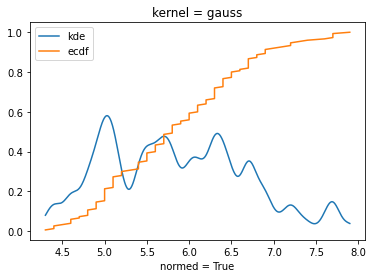

In [4]:
iris = sns.load_dataset("iris")
x = iris.sepal_length

kde = kernel_density_est(x, normed = True, kernel_type = "gauss")
print(kde.get_params())
print(kde.get_bins())
kde.display()
kde.show_ecdf()

#### Wraping-up

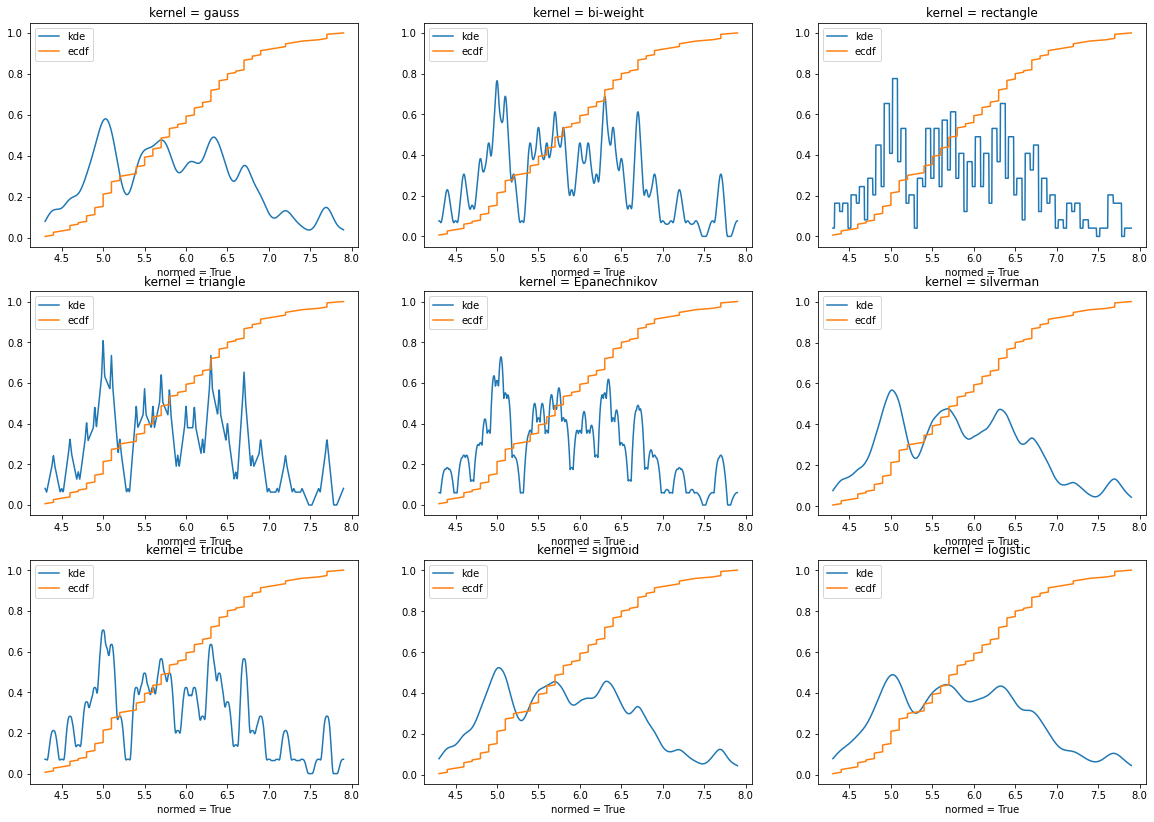

In [5]:
plt.figure(figsize = (20, 14))
for idx, kernel_name in enumerate(["gauss", "bi-weight", "rectangle", 
                                   "triangle", "Epanechnikov", "silverman",
                                   "tricube", "sigmoid", "logistic"]):
    kde = kernel_density_est(x, normed = True, kernel_type = kernel_name)
    plt.subplot(3, 3, idx +1)
    kde.display()
    kde.show_ecdf()
plt.show()

#### Checking help-function

In [6]:
help(kde)

Help on kernel_density_est in module __main__ object:

class kernel_density_est(builtins.object)
 |  kernel_density_est(data, kernel_type='gauss', normed=True)
 |  
 |  ***********************************************************************
 |  *    This class used for:
 |  *        - 1) Find the optimal_bins
 |  *        - 2) Display many k.d.e with different type of kernel_function
 |  *        - 3) Given the ecdf of the data.
 |  *    
 |  *     of the 1-D data input.
 |  ************************************************************************
 |  * Parameters :
 |  *-------------------------------------------------------------------------
 |  *     data : must be 1-D dataset
 |  *     kernel_type (str): type of kernel, can be {"gauss", "bi-weight", "rectangle".
 |  *                                               "triangle", "Epanechnikov", "silverman",
 |  *                                               "sigmoid", "logistic", "tri-cube"}
 |  *     normed : normed your kde and histo

## 2. Polynomial_Univariate_Regression
### 2.1. Define a class

In [7]:
class Polynomial_Univariate_Regression:
    """
    
    """
    def __init__(self):
        pass
    

## 3. Many testing_type.
### 3.1. Define a class

In [ ]:
class distribution_testing:
    """
    
    """
    def __init__(self):
        pass
    